In [1]:
import os
import tarfile
import urllib
import pandas as pd
import numpy as np
%matplotlib inline   
import matplotlib.pyplot as plt
from zlib import crc32
Colors = ['#004165','#dc4200',  '#69be28', '#f0be00', '#0cc6de', '#bed600', '#006983', '2b580c', '639a67']

In [2]:
rawdf = pd.read_csv( r'C:\Users\tranli\ColorMagic\operationviewtable_June05_2019_To_March17_2020.csv')
rawdf = rawdf.drop(columns = rawdf.columns.tolist()[0])
rawdf.describe().T

,count,mean,std,min,25%,50%,75%,max
AE1_load_kW,381944.0,7.441965e+02,6.229540e+02,0.000000e+00,0.000000e+00,1.023300e+03,1.279390e+03,2.030440e+03
AE2_load_kW,381944.0,5.407478e+02,6.140753e+02,-6.700000e-01,0.000000e+00,0.000000e+00,1.133310e+03,1.795770e+03
AE3_load_kW,381944.0,7.988382e+02,6.152733e+02,-1.670000e+00,0.000000e+00,1.056620e+03,1.303730e+03,1.803320e+03
AE4_load_kW,381944.0,5.443597e+02,6.036351e+02,-2.000000e-01,0.000000e+00,0.000000e+00,1.126870e+03,1.811670e+03
ME1_load_pros,381946.0,4.994193e+01,2.747215e+01,0.000000e+00,3.643000e+01,5.733000e+01,6.773000e+01,1.100000e+02
ME2_load_pros,381946.0,4.922733e+01,2.840486e+01,0.000000e+00,3.347000e+01,5.627000e+01,6.947000e+01,1.100000e+02
ME3_load_pros,381946.0,4.655576e+01,2.792235e+01,0.000000e+00,2.980000e+01,5.400000e+01,6.417000e+01,1.100000e+02
ME4_load_pros,381945.0,4.803056e+01,2.849677e+01,0.000000e+00,3.100000e+01,5.589000e+01,6.667000e+01,1.100000e+02
groundangle_deg,383001.0,1.497708e+02,1.280296e+02,0.000000e+00,1.291000e+01,1.628300e+02,2.201000e+02,3.599800e+02
heading_deg,382643.0,1.549383e+02,1.211917e+02,0.000000e+00,3.660000e+01,1.634000e+02,2.190500e+02,3.599900e+02


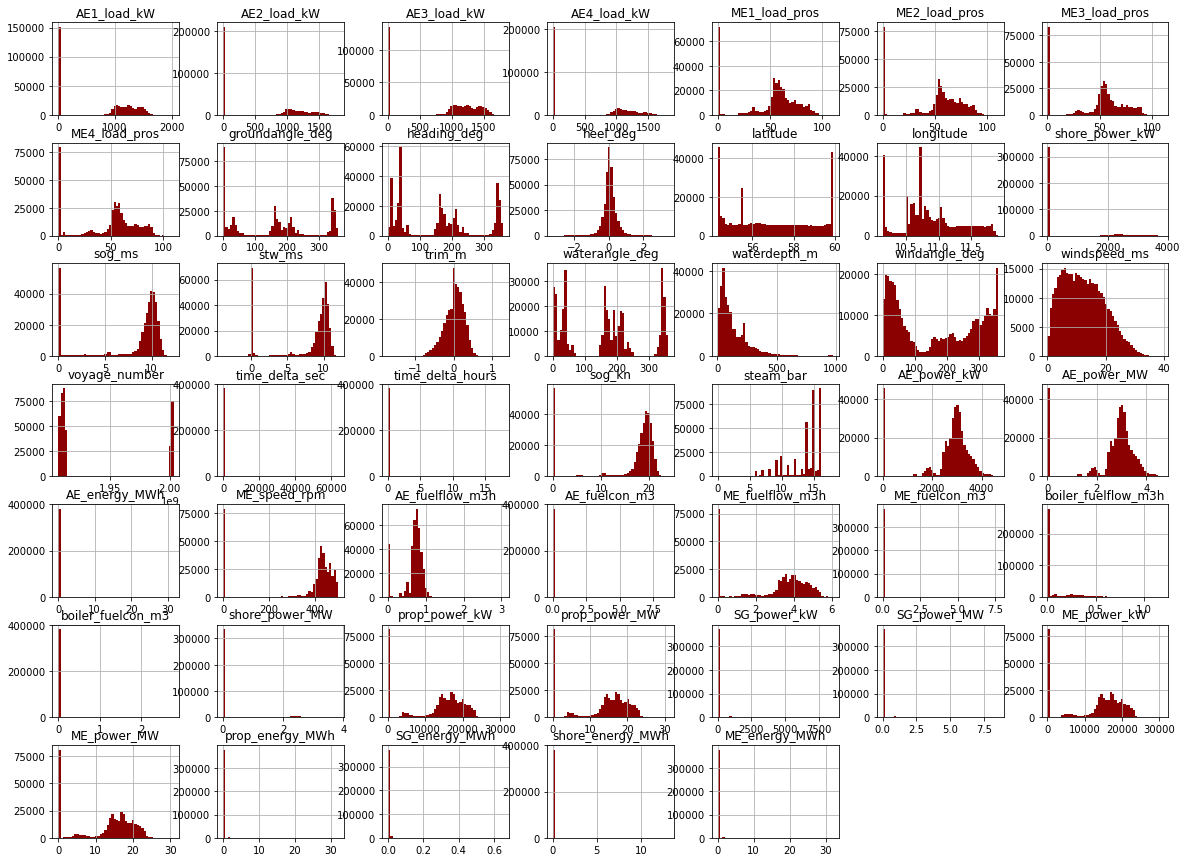

In [3]:
rawdf.hist(bins=50, figsize=(20,15), color = "darkred")
plt.show()

In [4]:
# Focus on the interested attributes
attributes = ["prop_power_kW","sog_kn", "windspeed_ms","waterdepth_m" , "trim_m" ]
subdf         = rawdf[attributes]

# Discover and Visualize the Data to Gain Insights

Text(0.5, 1.0, 'Visualization that highlights high-density areas')

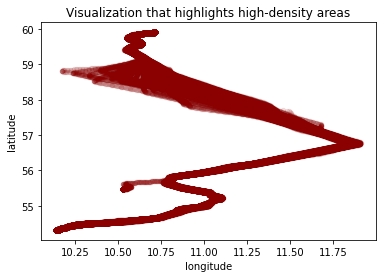

In [5]:
data = rawdf.copy()
data.plot(kind="scatter", x="longitude", y="latitude",color = "darkred",  alpha=0.1)
plt.title("Visualization that highlights high-density areas")

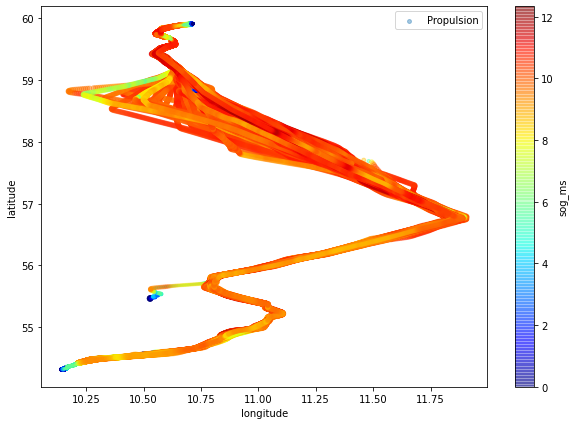

In [6]:
data = rawdf.copy()
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=data['prop_power_kW']/1000, label="Propulsion", figsize=(10,7),
             c="sog_ms", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

# Looking for Correlations

In [7]:
#General look of the whole data set
data          = rawdf.copy()
corr_matrix = data.corr()
corr_matrix["prop_power_kW"].sort_values(ascending=False)

prop_power_MW          1.000000
prop_power_kW          1.000000
ME_power_MW            0.999167
ME_power_kW            0.999167
ME_fuelflow_m3h        0.996574
ME2_load_pros          0.974164
ME4_load_pros          0.966176
ME3_load_pros          0.961404
ME1_load_pros          0.960657
stw_ms                 0.942386
sog_ms                 0.928350
sog_kn                 0.928350
ME_speed_rpm           0.890382
steam_bar              0.826374
prop_energy_MWh        0.789144
ME_energy_MWh          0.787088
ME_fuelcon_m3          0.782307
AE_power_MW            0.721013
AE_power_kW            0.721013
AE_fuelflow_m3h        0.698350
windspeed_ms           0.638245
groundangle_deg        0.570820
trim_m                 0.569019
longitude              0.563335
heading_deg            0.529744
AE3_load_kW            0.435105
waterangle_deg         0.425048
AE_energy_MWh          0.394817
AE1_load_kW            0.388617
AE_fuelcon_m3          0.374796
waterdepth_m           0.359909
AE2_load

In [8]:
from pandas.plotting import scatter_matrix
data = subdf.copy()
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,prop_power_kW,sog_kn,windspeed_ms,waterdepth_m,trim_m
prop_power_kW,1.00,0.93,0.64,0.36,0.57
sog_kn,0.93,1.00,0.49,0.36,0.60
windspeed_ms,0.64,0.49,1.00,0.17,0.31
waterdepth_m,0.36,0.36,0.17,1.00,0.17
trim_m,0.57,0.60,0.31,0.17,1.00


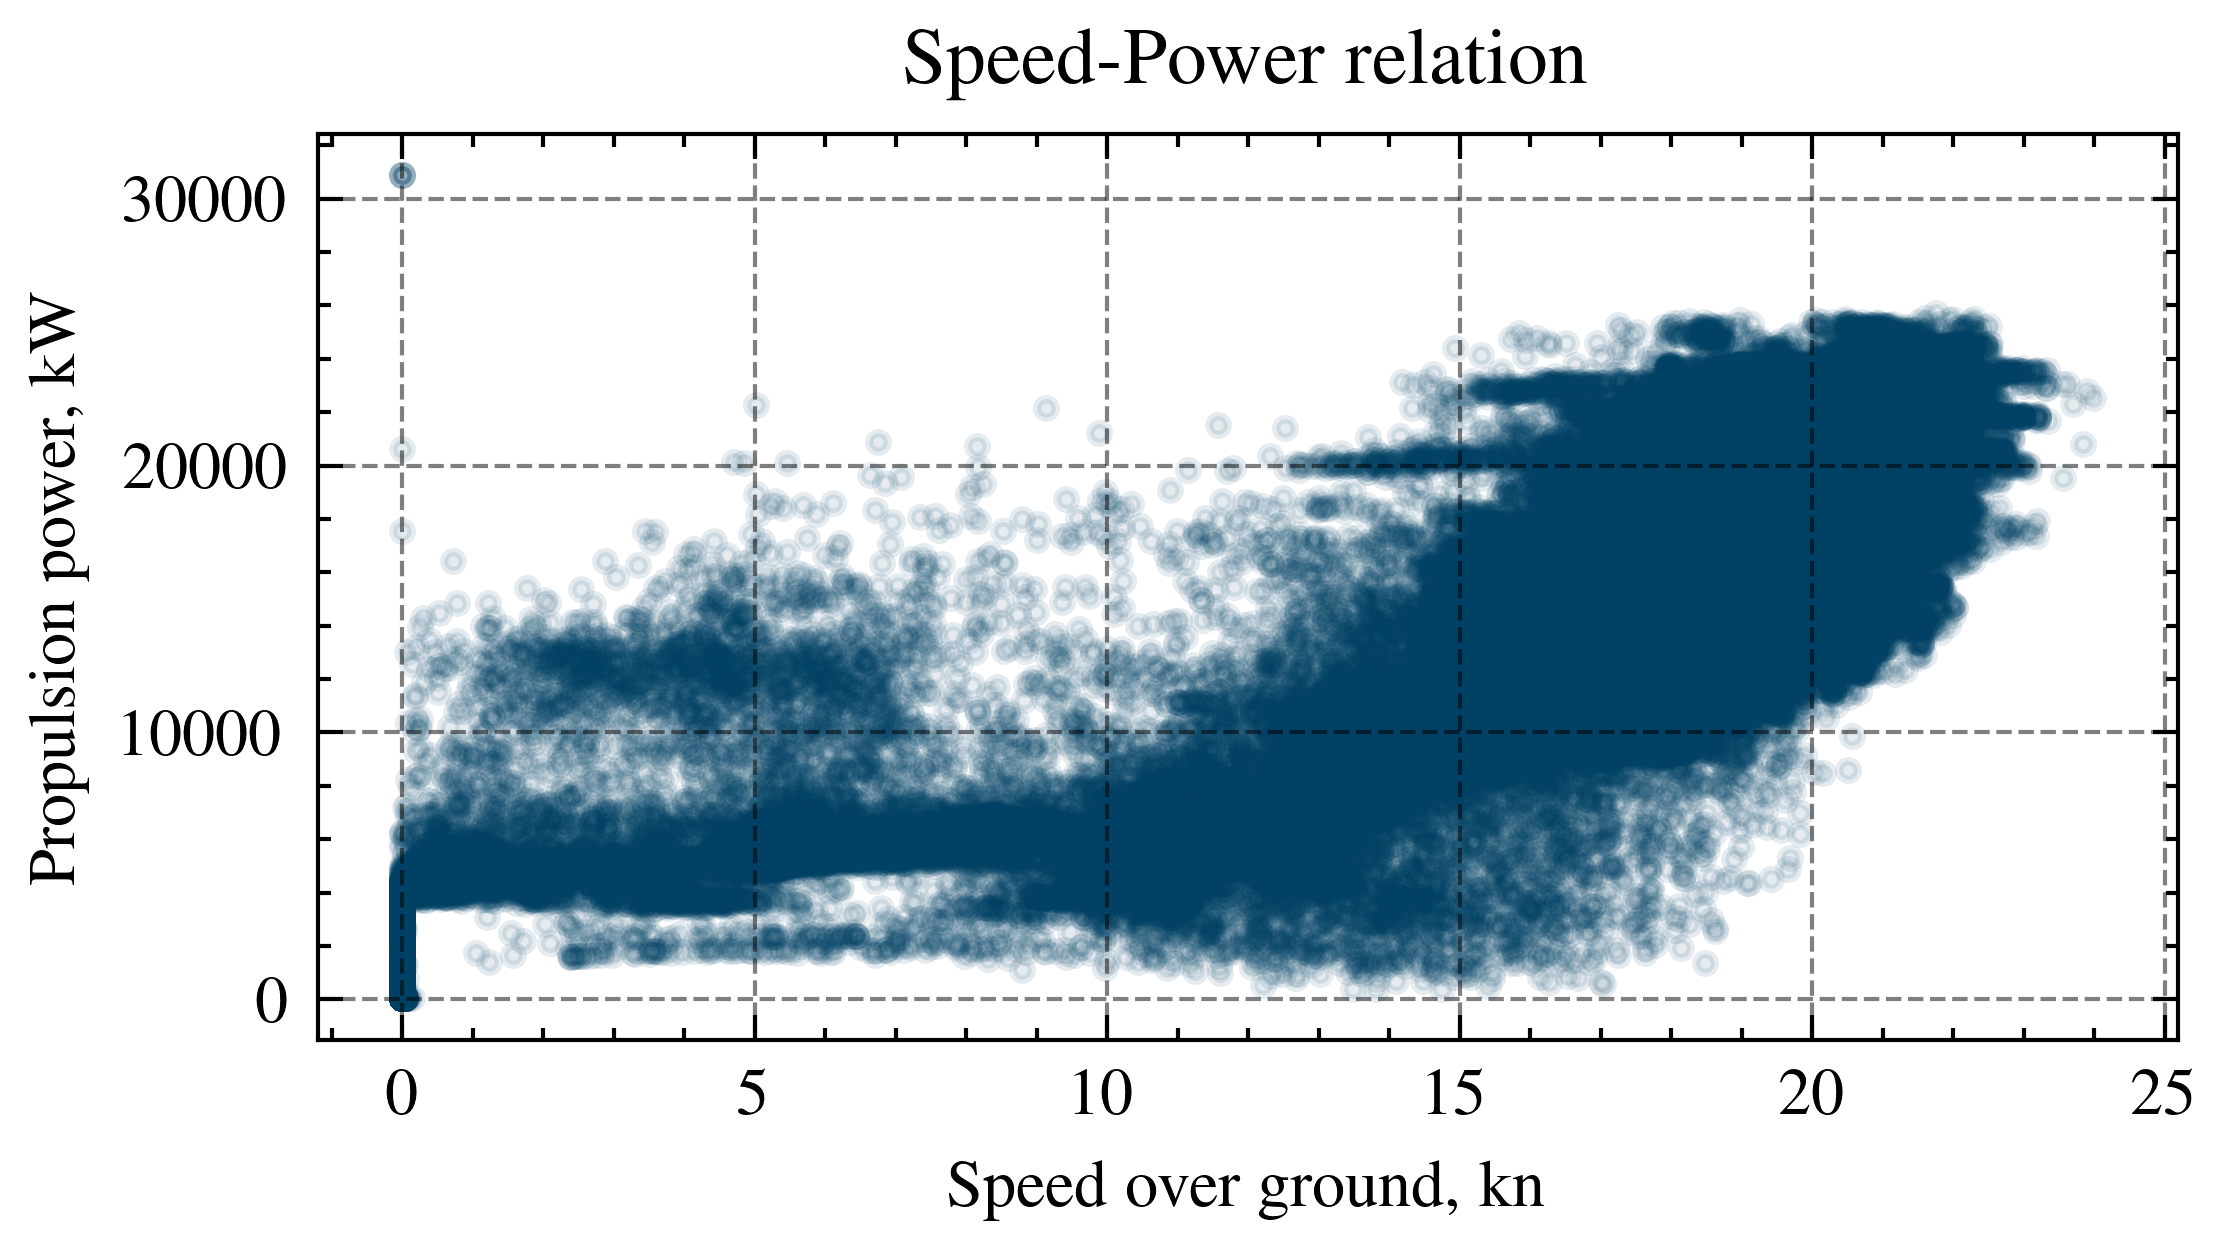

In [9]:
data = subdf.copy()
with plt.style.context(['science', 'ieee', "grid"]):
    plt.rcParams["figure.figsize"] =  4,2
    plt.scatter(data.sog_kn,data.prop_power_kW,  color = Colors[0], s =5,alpha=0.1)
    plt.title("Speed-Power relation")
    plt.ylabel("Propulsion power, kW")
    plt.xlabel("Speed over ground, kn")
    plt.show()

  # Data clearning for Machine Learning Algorithms  

Text(0.5, 1.0, 'Percent missing data by feature')

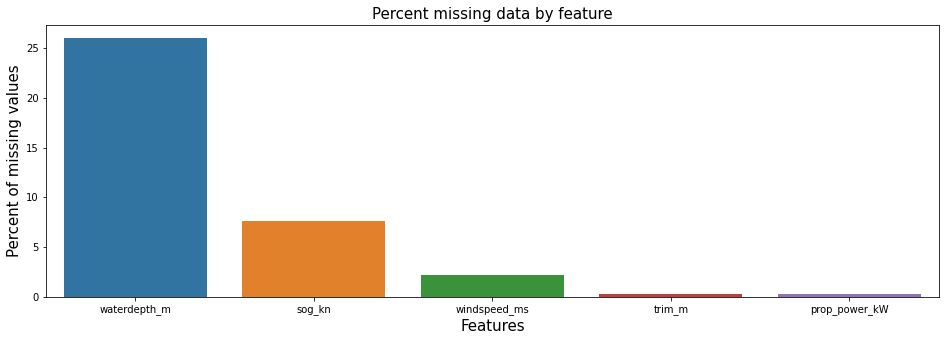

In [10]:
# Find Missing Ratio of Dataset 
data =  subdf.copy()
all_data_na = (data.isnull().sum() / len(data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio (%)' :all_data_na})

# Percent missing data by feature
import seaborn as sns
f, ax = plt.subplots(figsize=(16, 5))
plt.xticks()
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [11]:
#Replacing NaN by the median value
for attr in attributes:
    rawdf[attr].fillna(rawdf[attr].median(), inplace = True)

from sklearn.impute import SimpleImputer
data = subdf.copy()
imputer = SimpleImputer(strategy="median")
imputer.fit(data)
imputer.statistics_

In [13]:
X = imputer.transform(data[attributes])
df_transformed = pd.DataFrame(X, columns=attributes,
                          index=subdf.index)
df_transformed

,prop_power_kW,sog_kn,windspeed_ms,waterdepth_m,trim_m
0,49.43,0.0,4.27,93.33,-0.32
1,49.99,0.0,5.81,93.33,-0.35
2,50.01,0.0,5.97,93.33,-0.36
3,51.34,0.0,4.89,93.33,-0.34
4,50.27,0.0,5.71,93.33,-0.35
...,...,...,...,...,...
383121,60.33,0.0,10.64,93.33,-0.11
383122,60.00,0.0,10.79,93.33,-0.11
383123,60.07,0.0,11.27,93.33,-0.11
383124,60.10,0.0,11.59,93.33,-0.11


In [14]:
from sklearn.preprocessing import OrdinalEncoder
data = rawdf.copy()
direction = data.voyage_last_port
direction =np.array(direction).reshape(-1,1)
ordinal_encoder = OrdinalEncoder()
subdf_dir_encoded = ordinal_encoder.fit_transform(direction)
subdf_dir_encoded[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [15]:
ordinal_encoder.categories_

[array(['Kiel', 'Oslo'], dtype=object)]

In [16]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
subdf_dir_1hot = cat_encoder.fit_transform(direction)
subdf_dir_1hot

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

# Train a model

In [17]:
def displace_error(y_test,pred):
    mae =mean_absolute_error(y_test,pred)
    mse =mean_squared_error(y_test,pred)
    me  = max_error(y_test,pred)
    r2  = r2_score(y_test,pred)
    error = pd.DataFrame([mae,mse, me, r2], index = ["mean_absolute_error", "mean_squared_error", "maximum_error", "R2 score" ], columns =["Error"])
    print(error)
    return error

In [18]:
# Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

data = rawdf.copy()

features = ["sog_kn", "windspeed_ms","waterdepth_m" , "trim_m" ]  # independent variables 

X        = data[features].values
y        = data["prop_power_kW"].values  # target variable (dependent variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

LinReg = LinearRegression()
LinReg.fit(X_train, y_train)
pred      = LinReg.predict(X_test)

lr_error = displace_error(y_test,pred)

                            Error
mean_absolute_error  2.950739e+03
mean_squared_error   1.726321e+07
maximum_error        2.822170e+04
R2 score             7.098057e-01


In [19]:
# Random forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import preprocessing 
data = rawdf.copy()

features = ["sog_kn", "windspeed_ms","waterdepth_m" , "trim_m" ]  # independent variables 

X        = data[features].values
y        = data["prop_power_kW"].values  # target variable (dependent variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

RanForest = RandomForestRegressor(random_state=1, n_estimators=100)
RanForest.fit(X_train, y_train)
pred      = RanForest.predict(X_test)

rf_error = displace_error(y_test,pred)

                            Error
mean_absolute_error  9.716771e+02
mean_squared_error   2.417357e+06
maximum_error        3.083329e+04
R2 score             9.593643e-01


In [20]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
data = rawdf.copy()
features = ["sog_kn", "windspeed_ms","waterdepth_m" , "trim_m" ]  # independent variables 
X        = data[features].values
y        = data["prop_power_kW"].values  # target variable (dependent variable)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
pred     = tree_reg.predict(X_test)
tr_error = displace_error(y_test,pred)

                            Error
mean_absolute_error  1.217619e+03
mean_squared_error   4.584481e+06
maximum_error        3.083383e+04
R2 score             9.229349e-01


# Fine-Tune models

In [21]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [22]:
from sklearn.model_selection import cross_val_score

scores  = cross_val_score(tree_reg, X_test, y_test,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)
pd.Series(np.sqrt(-scores)).describe()

Scores: [2264.77289993 2284.10260397 2278.12940371 2303.64381633 2224.62898565
 2278.52144334 2245.42587917 2308.44365371 2307.97229412 2276.91401182]
Mean: 2277.255499175698
Standard deviation: 25.691285405331335


count      10.000000
mean     2277.255499
std        27.080993
min      2224.628986
25%      2267.808178
50%      2278.325424
75%      2298.758513
max      2308.443654
dtype: float64

In [23]:
# Grid Search
# Requirement: which hyperparameters and what values. The Grid search uses cross-validation to evaluate all possible 
# combinations of hyperparameters values.
from sklearn.model_selection import GridSearchCV
param_grid = [
    # try 9 (3×3) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train,y_train)

C:\Users\tranli\Wdomain\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tranli\Wdomain\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tranli\Wdomain\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\tranli\Wdomain\li

C:\Users\tranli\Wdomain\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tranli\Wdomain\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tranli\Wdomain\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\tranli\Wdomain\li

C:\Users\tranli\Wdomain\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tranli\Wdomain\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tranli\Wdomain\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\tranli\Wdomain\li

C:\Users\tranli\Wdomain\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tranli\Wdomain\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tranli\Wdomain\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\tranli\Wdomain\li

C:\Users\tranli\Wdomain\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tranli\Wdomain\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tranli\Wdomain\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\tranli\Wdomain\li

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [24]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [25]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=30, random_state=42)

In [26]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1824.1900082988393 {'max_features': 2, 'n_estimators': 3}
1637.9380622384233 {'max_features': 2, 'n_estimators': 10}
1581.6919356260596 {'max_features': 2, 'n_estimators': 30}
1831.4311594655624 {'max_features': 4, 'n_estimators': 3}
1653.5970101417631 {'max_features': 4, 'n_estimators': 10}
1600.7671554997355 {'max_features': 4, 'n_estimators': 30}
nan {'max_features': 6, 'n_estimators': 3}
nan {'max_features': 6, 'n_estimators': 10}
nan {'max_features': 6, 'n_estimators': 30}
nan {'max_features': 8, 'n_estimators': 3}
nan {'max_features': 8, 'n_estimators': 10}
nan {'max_features': 8, 'n_estimators': 30}
1807.2030594044036 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1641.0690375219979 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
1815.9531943560446 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1667.9671213157658 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
2158.0345764423955 {'bootstrap': False, 'max_features': 4, 'n_estimators

In [27]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.411081,0.103668,0.122201,0.008651,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.299615e+06,-3.335793e+06,...,-3.327669e+06,25831.990238,9,-869837.165833,-860024.427694,-849333.476055,-856721.669210,-855767.023740,-858336.752506,6713.847497
1,9.815026,0.358492,0.464215,0.032887,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.670482e+06,-2.681809e+06,...,-2.682841e+06,11636.062236,3,-501259.863876,-498207.081842,-499292.471745,-492241.651496,-491205.771184,-496441.368029,3987.819785
2,23.750092,3.477598,1.128529,0.108520,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.485848e+06,-2.509489e+06,...,-2.501749e+06,9057.449715,1,-396481.488060,-394879.070328,-393661.157043,-388215.795696,-389329.595345,-392513.421294,3202.045597
3,3.646371,0.079812,0.111218,0.009916,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.337507e+06,-3.366073e+06,...,-3.354140e+06,11207.965259,10,-856979.799232,-854869.880704,-854862.806698,-845988.420848,-860813.108370,-854702.803170,4868.562745
4,12.378361,0.310607,0.363306,0.028596,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.728210e+06,-2.737617e+06,...,-2.734383e+06,7317.769874,5,-503710.734958,-500677.387551,-503868.752839,-495415.141052,-497409.121984,-500216.227677,3367.356969
5,39.278917,1.744370,1.210511,0.290247,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.552694e+06,-2.559807e+06,...,-2.562455e+06,10313.389138,2,-401435.706407,-400667.215082,-402173.818206,-393976.189416,-395563.574771,-398763.300777,3333.255237
6,0.026007,0.001425,0.000000,0.000000,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",NaN,NaN,...,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.029791,0.002471,0.000000,0.000000,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",NaN,NaN,...,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.038203,0.001921,0.000000,0.000000,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",NaN,NaN,...,NaN,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.025424,0.003811,0.000000,0.000000,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",NaN,NaN,...,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train,y_train)

C:\Users\tranli\Wdomain\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tranli\Wdomain\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tranli\Wdomain\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\tranli\Wdomain\li

C:\Users\tranli\Wdomain\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tranli\Wdomain\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tranli\Wdomain\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\tranli\Wdomain\li

C:\Users\tranli\Wdomain\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tranli\Wdomain\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tranli\Wdomain\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\tranli\Wdomain\li

C:\Users\tranli\Wdomain\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tranli\Wdomain\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tranli\Wdomain\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\tranli\Wdomain\li

C:\Users\tranli\Wdomain\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tranli\Wdomain\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tranli\Wdomain\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\tranli\Wdomain\li

C:\Users\tranli\Wdomain\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\tranli\Wdomain\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tranli\Wdomain\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\tranli\Wdomain\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\tranli\Wdomain\li

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B92DE9CF08>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B92DE9CE08>},
                   random_state=42, scoring='neg_mean_squared_error')

In [29]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'max_features': 7, 'n_estimators': 180}
nan {'max_features': 5, 'n_estimators': 15}
1572.0698476843984 {'max_features': 3, 'n_estimators': 72}
nan {'max_features': 5, 'n_estimators': 21}
nan {'max_features': 7, 'n_estimators': 122}
1571.7941014132246 {'max_features': 3, 'n_estimators': 75}
1570.452654665288 {'max_features': 3, 'n_estimators': 88}
nan {'max_features': 5, 'n_estimators': 100}
1566.3696107234707 {'max_features': 3, 'n_estimators': 150}
nan {'max_features': 5, 'n_estimators': 2}


In [30]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.54810902, 0.23861811, 0.09031304, 0.12295983])

In [32]:
from scipy import stats

confidence = 0.95
squared_errors = (pred - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([2124.02473711, 2158.11980575])

In [33]:
m = len(squared_errors)
mean = squared_errors.mean()
tscore = stats.t.ppf((1 + confidence) / 2, df=m - 1)
tmargin = tscore * squared_errors.std(ddof=1) / np.sqrt(m)
np.sqrt(mean - tmargin), np.sqrt(mean + tmargin)

(2124.024737113509, 2158.1198057532533)

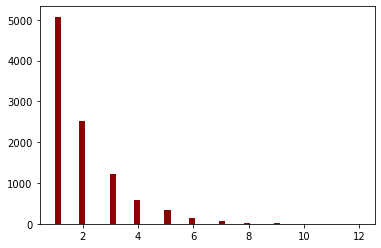

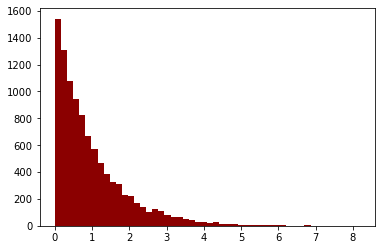

In [38]:
from scipy.stats import geom, expon
geom_distrib=geom(0.5).rvs(10000, random_state=42)
expon_distrib=expon(scale=1).rvs(10000, random_state=42)
plt.hist(geom_distrib,color="darkred", bins=50)
plt.show()
plt.hist(expon_distrib,color="darkred", bins=50)
plt.show()

Try a Support Vector Machine regressor (sklearn.svm.SVR), with various hyperparameters such as kernel="linear" (with various values for the C hyperparameter) or kernel="rbf" (with various values for the C and gamma hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best SVR predictor perform?

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)
negative_mse = rnd_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search.fit(X_train, y_train)